In [53]:
from manim import *

config.media_width = "60%"

# Complex Function grapher megatool

This is a complex function viewing tool that take in a complex function defined in Python and spit out a bunch of pictures and videos for you.

In [54]:
def f(z):
    return (z-1+1j)*(z+1-1j)

The cell above is the function you want to graph, and the only bit you should need to edit. When you have changed it to what you want, go up to `Cell` in the menu bar above and press `Run all` to redraw everything.

## Cartesian Transform

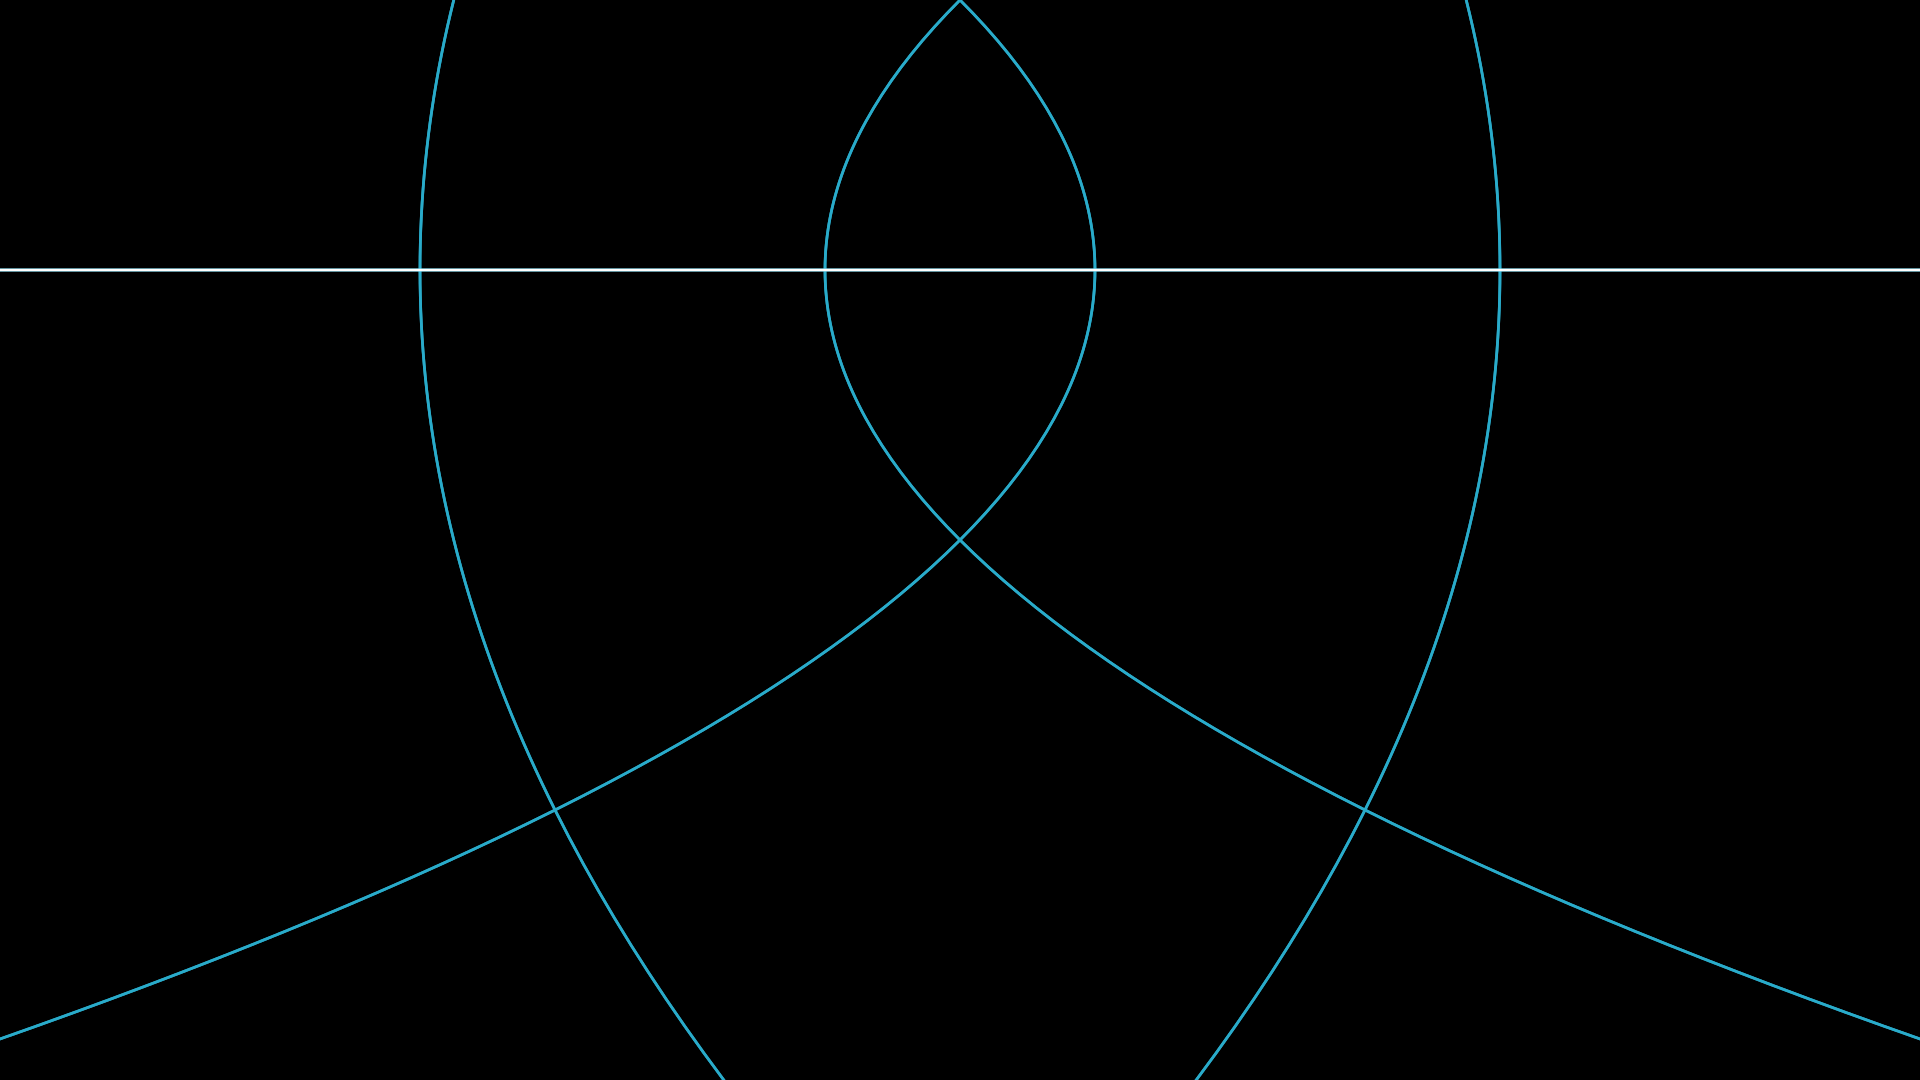

In [55]:
%%manim -v ERROR -qh -s TransformCartesian

def safe_f(z):
    try:
        return f(z)
    except Exception:
        return complex(0,0)

class TransformCartesian(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1])
        plane.prepare_for_nonlinear_transform()
        self.add(plane)
        self.play(
            plane.animate.apply_complex_function(safe_f)
        )

## Polar Transform

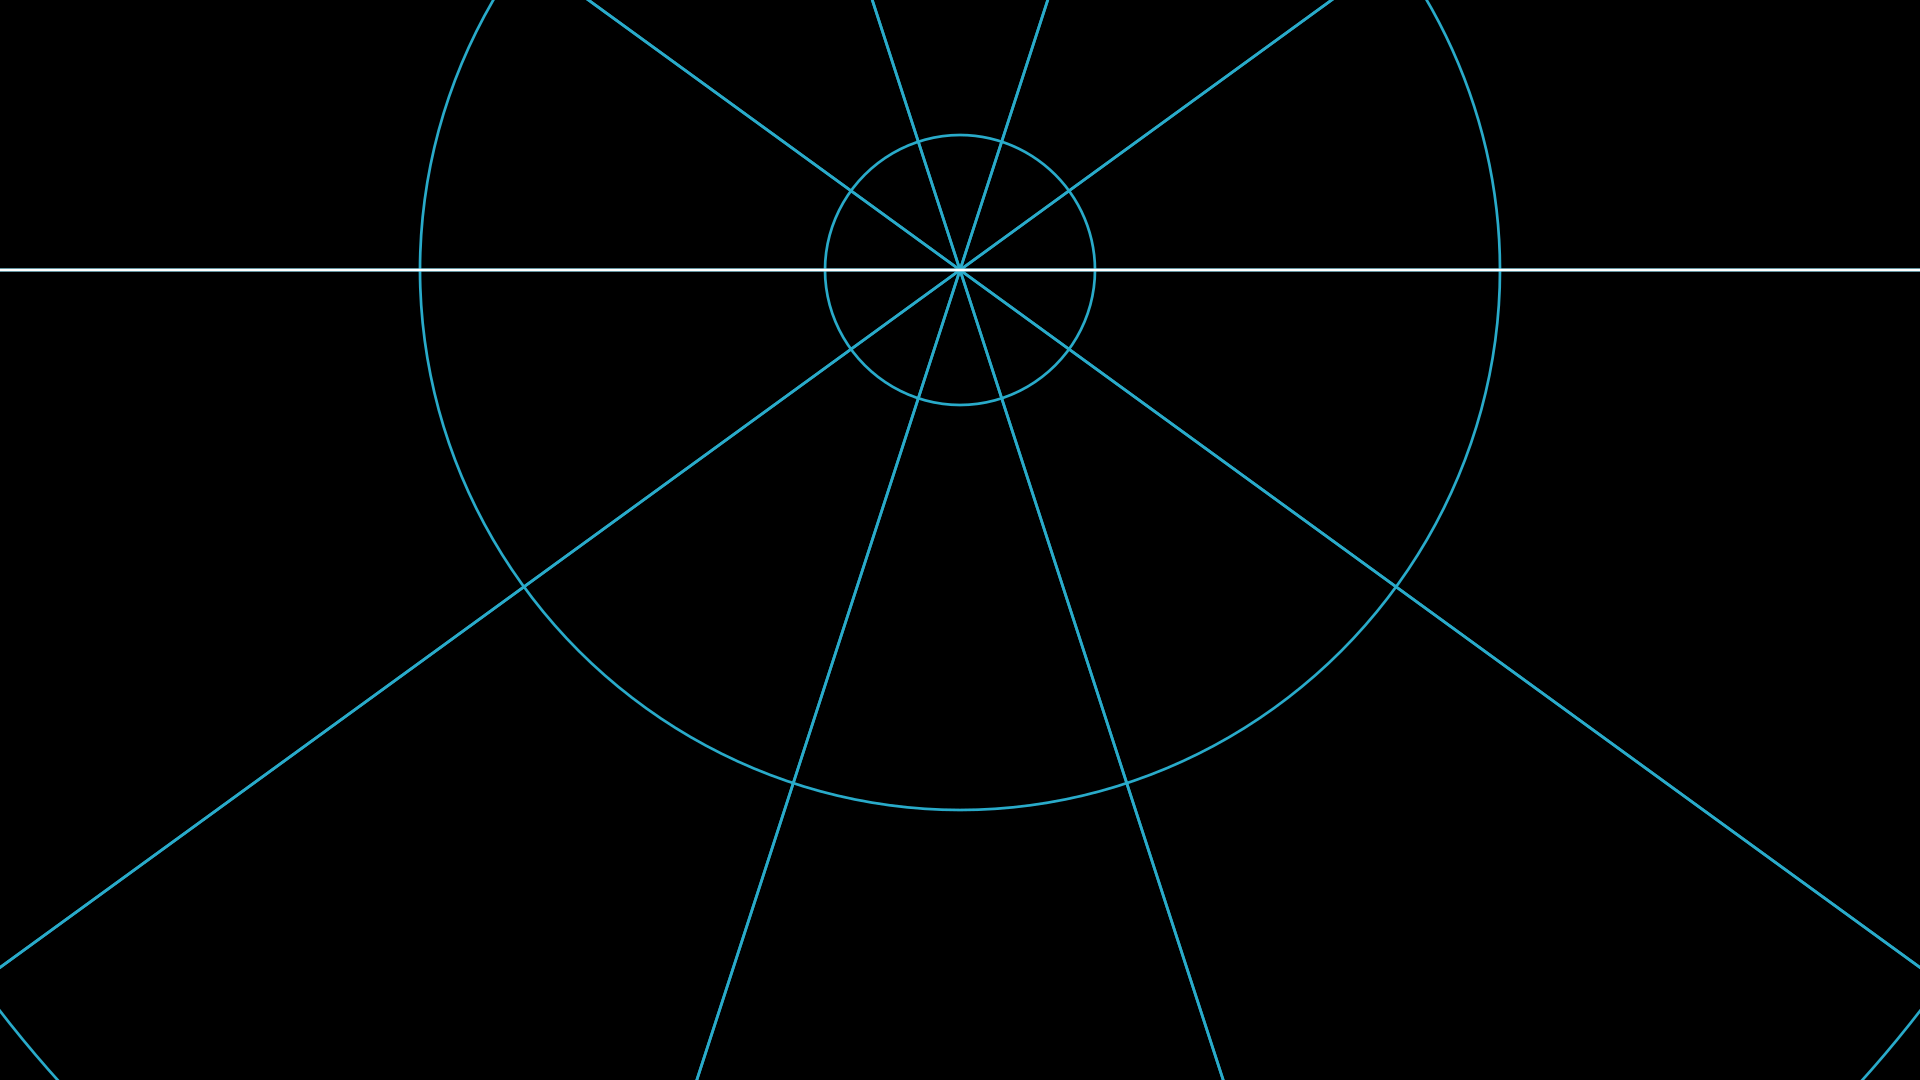

In [56]:
%%manim -v ERROR -qh -s TransformPolar

class TransformPolar(Scene):
    def construct(self):
        plane = PolarPlane(
            radius_max=10.0)
        plane.prepare_for_nonlinear_transform()
        self.add(plane)
        self.play(
            plane.animate.apply_complex_function(safe_f)
        )

## Vector Field

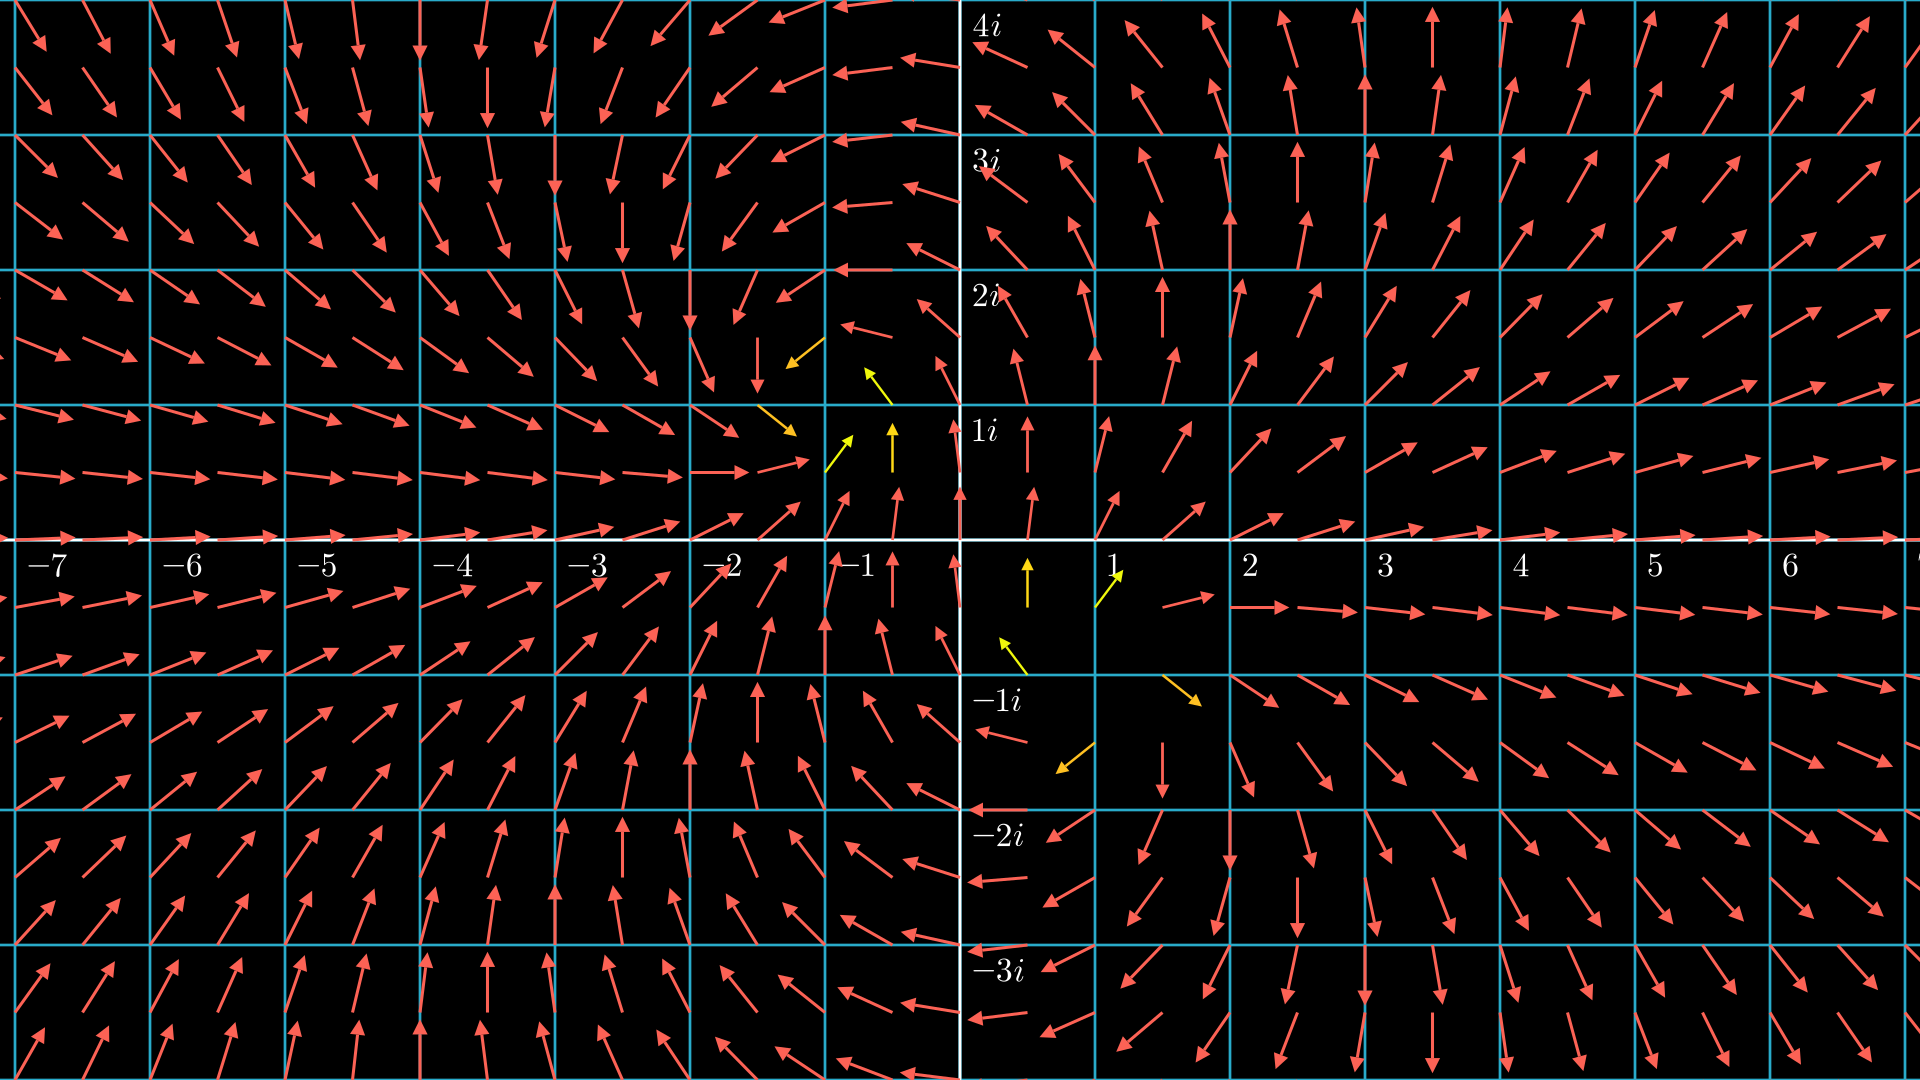

In [61]:
%%manim -v ERROR -qh -s ComplexVectorField

def vector_conversion(pos):
    f_in = complex(pos[0], pos[1])
    f_out = safe_f(f_in)
    diff = f_out - f_in
    #return diff.real * RIGHT + diff.imag * UP
    return f_out.real * RIGHT + f_out.imag * UP

class ComplexVectorField(Scene):
    def construct(self):
        func = lambda pos: vector_conversion(pos)
        plane = ComplexPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1]
        ).add_coordinates()
        self.add(plane, ArrowVectorField(func))

## Stream lines

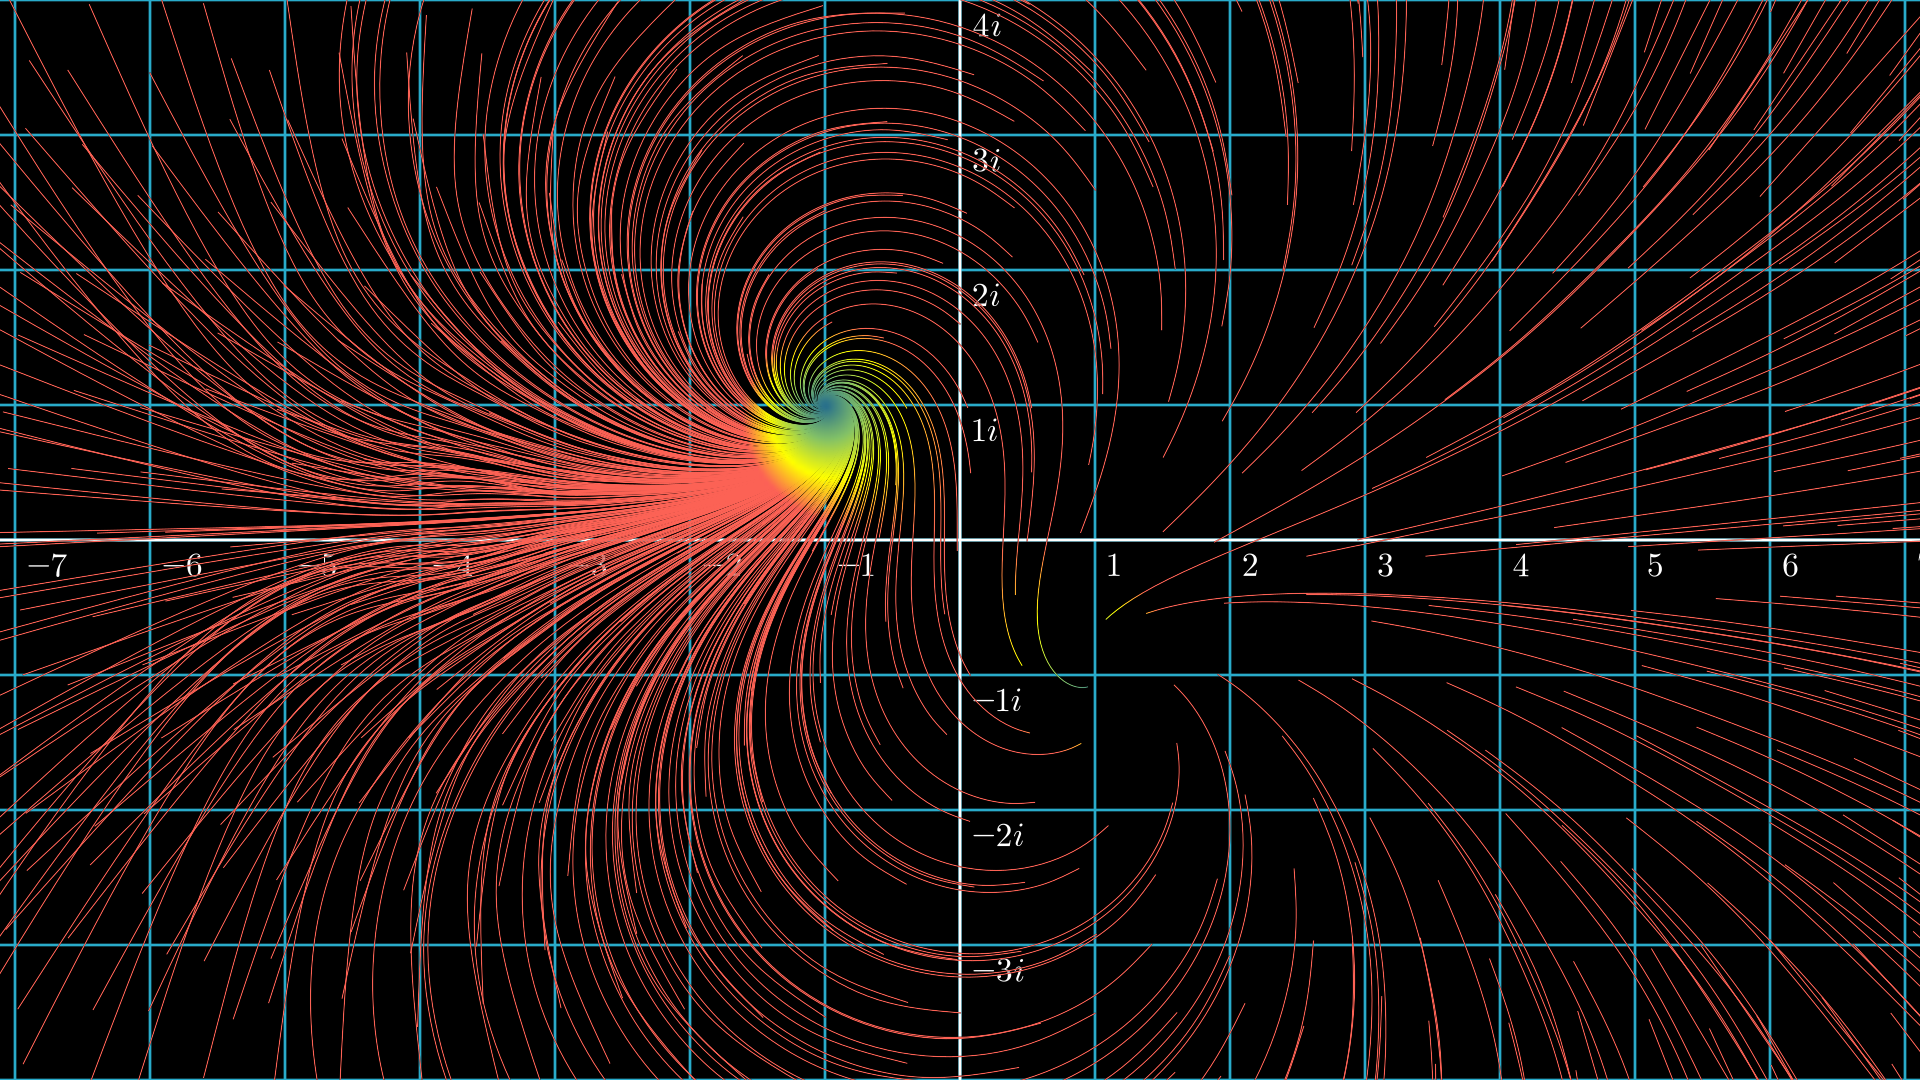

In [62]:
%%manim -v ERROR -qh -s ComplexStreamLines

class ComplexStreamLines(Scene):
    def construct(self):
        func = lambda pos: vector_conversion(pos)
        plane = ComplexPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1]
        ).add_coordinates()
        self.add(plane, StreamLines(func))

## Magnitude and Arg 3D plots

## Unit circle

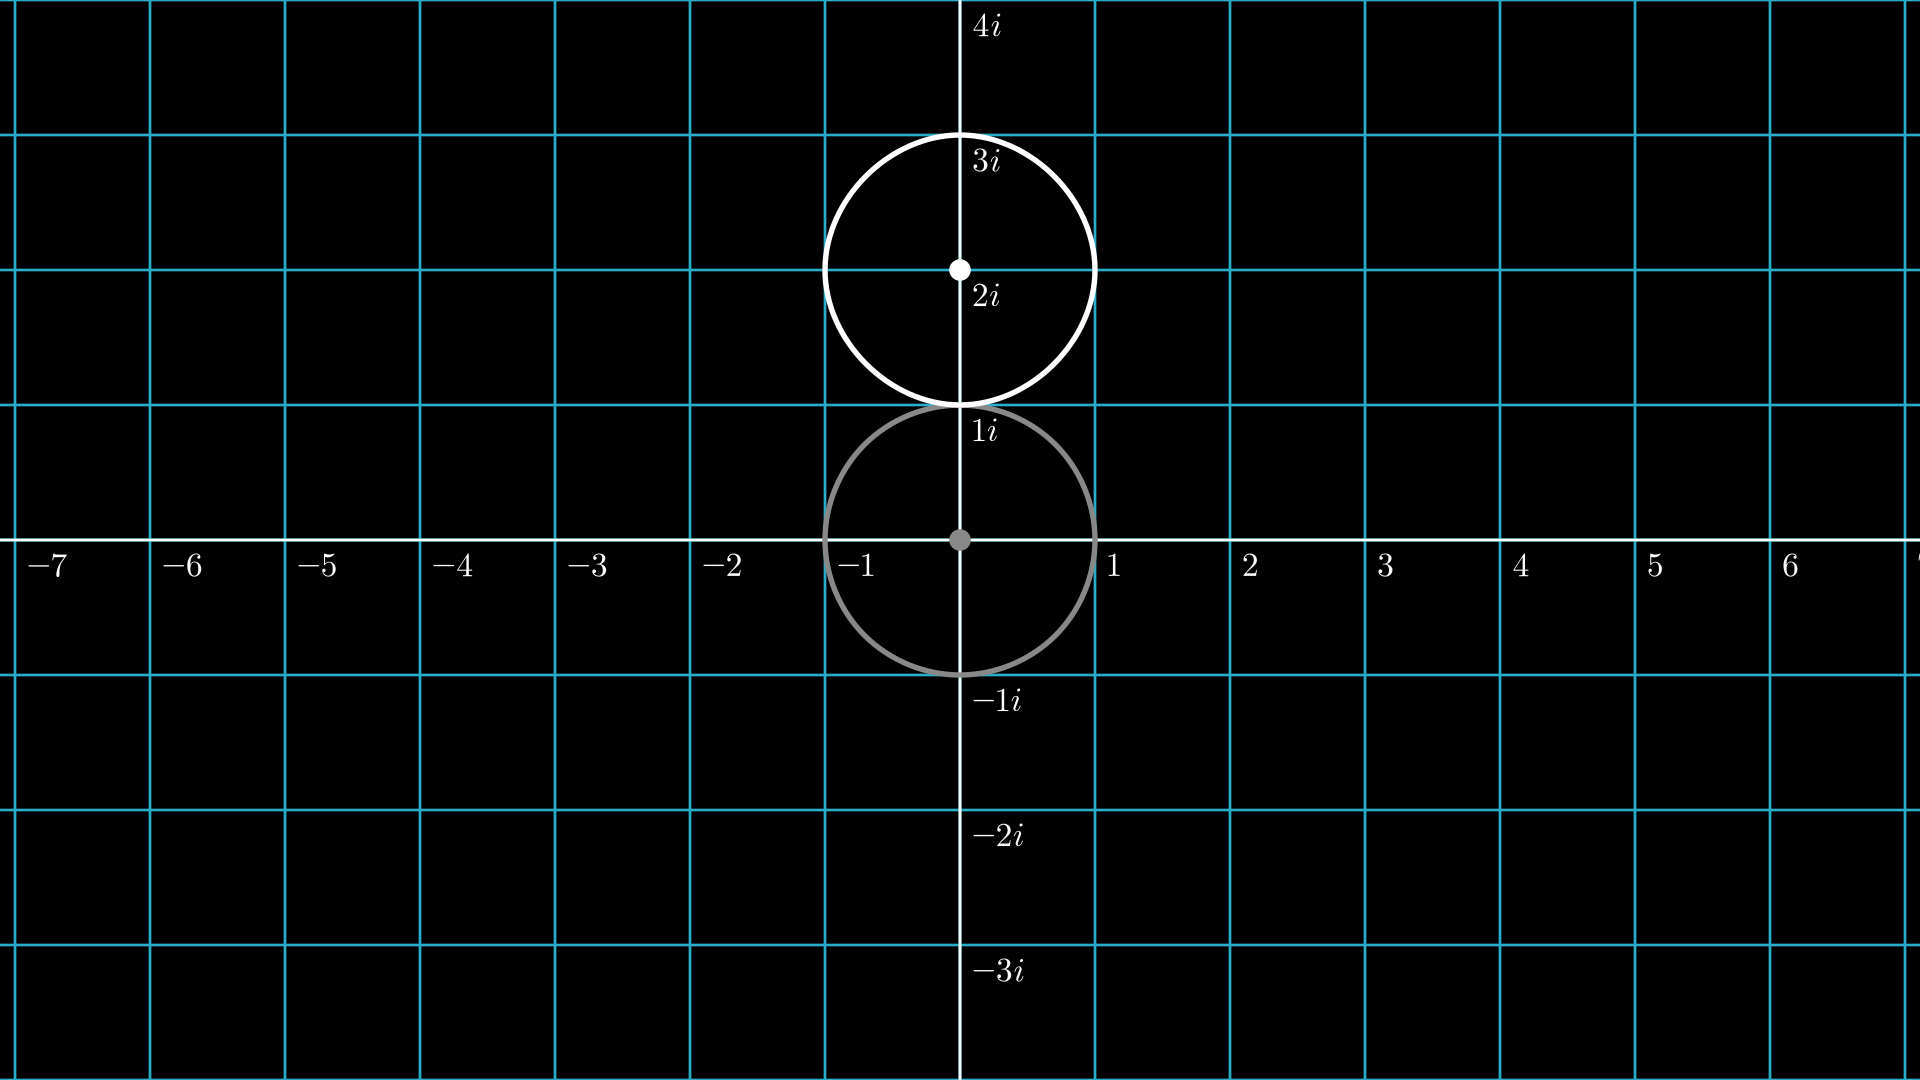

In [59]:
%%manim -v ERROR -qh -s UnitCircle

class UnitCircle(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1]
        ).add_coordinates()
        
        original_circle = Circle(color=GRAY)
        true_origin = Dot([0,0,0],color=GRAY)
        
        circle = Circle(color=WHITE)
        origin = safe_f(complex(0,0))
        dot = Dot([origin.real, origin.imag, 0])
        
        self.add(plane, original_circle, true_origin, circle, dot)
        self.play(
            circle.animate.apply_complex_function(safe_f)
        )

## Unit Square

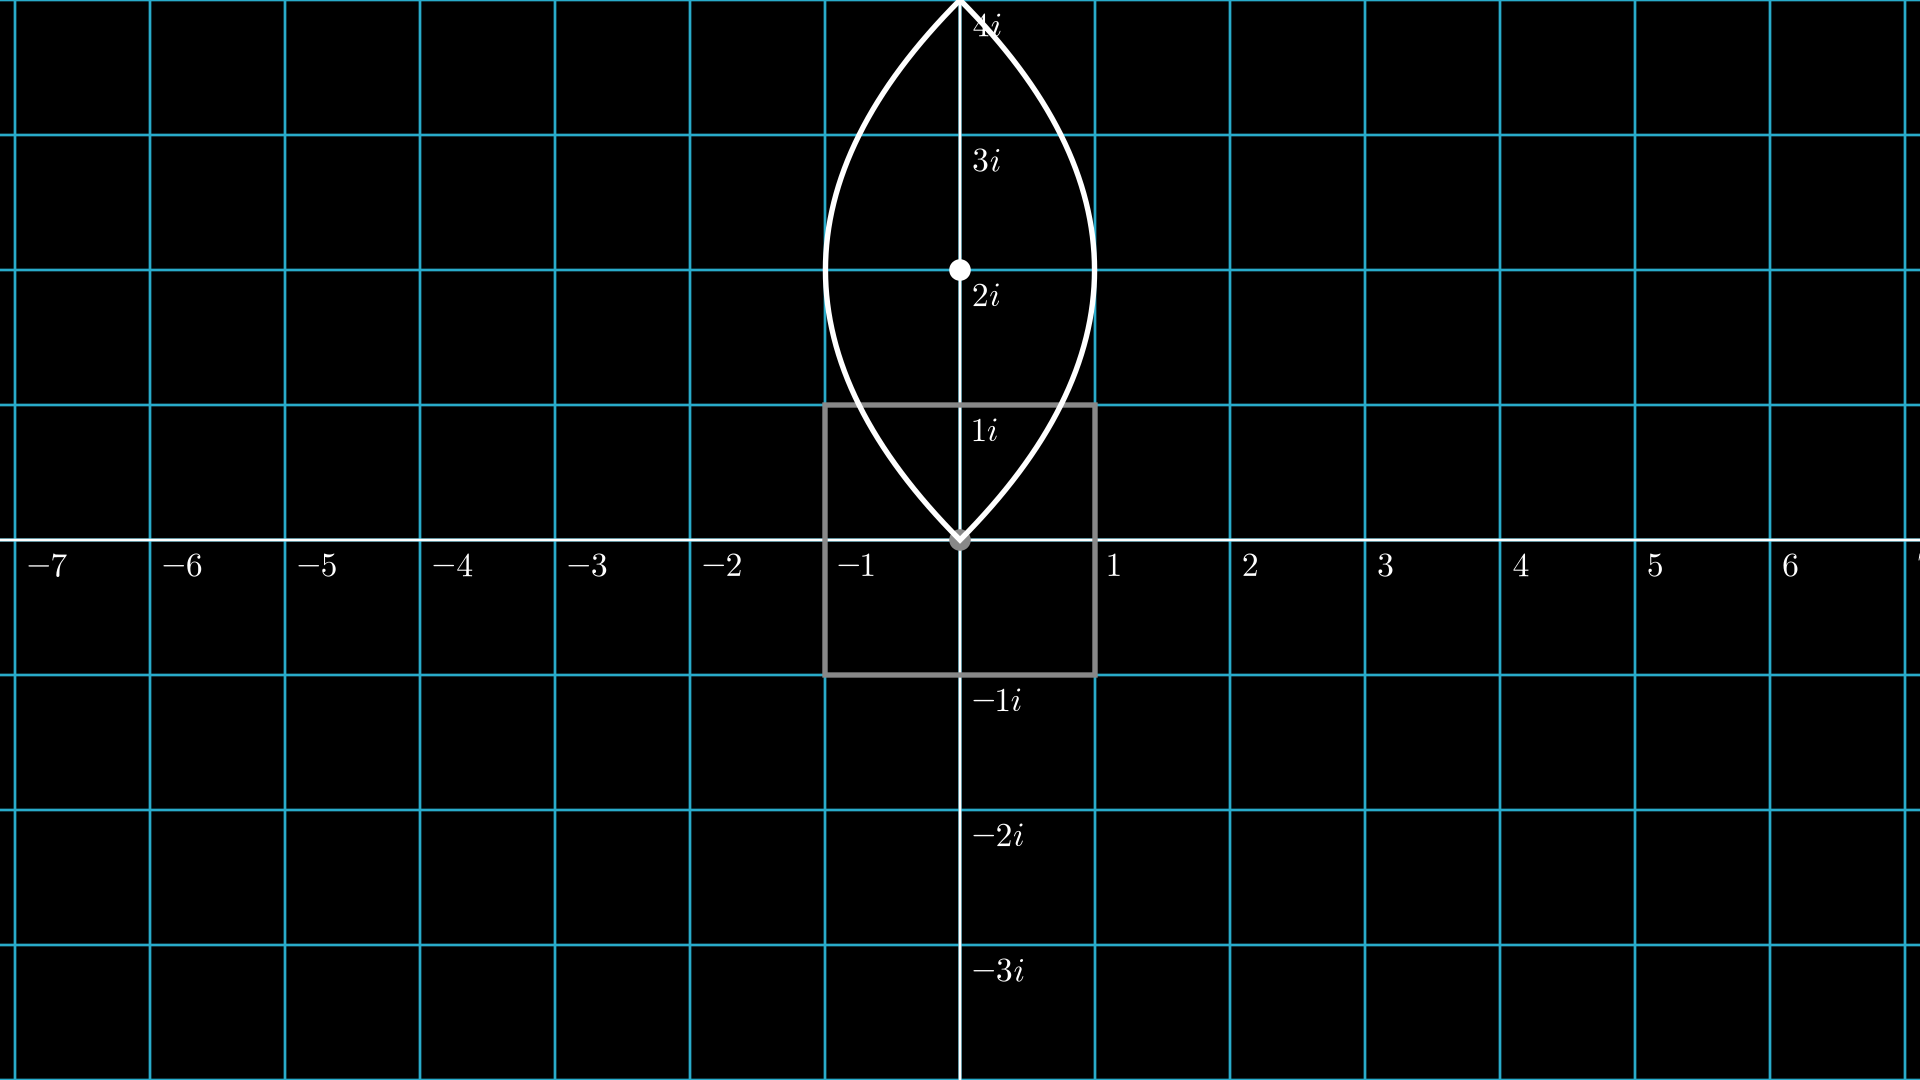

In [60]:
%%manim -v ERROR -qh -s UnitSquare

class UnitSquare(Scene):
    def construct(self):
        plane = ComplexPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1]
        ).add_coordinates()
        
        original_square = Square(color=GREY)
        true_origin = Dot([0,0,0], color=GREY)
        
        square = Square()
        origin = safe_f(complex(0,0))
        dot = Dot([origin.real, origin.imag, 0])
        
        self.add(plane, original_square, true_origin, square, dot)
        self.play(
            square.animate.apply_complex_function(safe_f)
        )